175, 177


### 1. EDA

#### 1-1. 데이터 로드

In [245]:
import pandas as pd 

# 데이터 로드 
df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')

# 데이터 정보 확인 
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      180 non-null    object 
 1   Region                       180 non-null    object 
 2   Year                         180 non-null    float64
 3   Infant_deaths                180 non-null    float64
 4   Under_five_deaths            180 non-null    float64
 5   Adult_mortality              180 non-null    float64
 6   Alcohol_consumption          180 non-null    float64
 7   Hepatitis_B                  180 non-null    float64
 8   Measles                      180 non-null    float64
 9   BMI                          180 non-null    float64
 10  Polio                        180 non-null    float64
 11  Diphtheria                   180 non-null    float64
 12  Incidents_HIV                180 non-null    float64
 13  GDP_per_capita      

#### 1-2. 결측값 처리

In [246]:
# 결측값 확인 
print(df.isnull().sum())

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64


#### 1-3. 이상치 처리

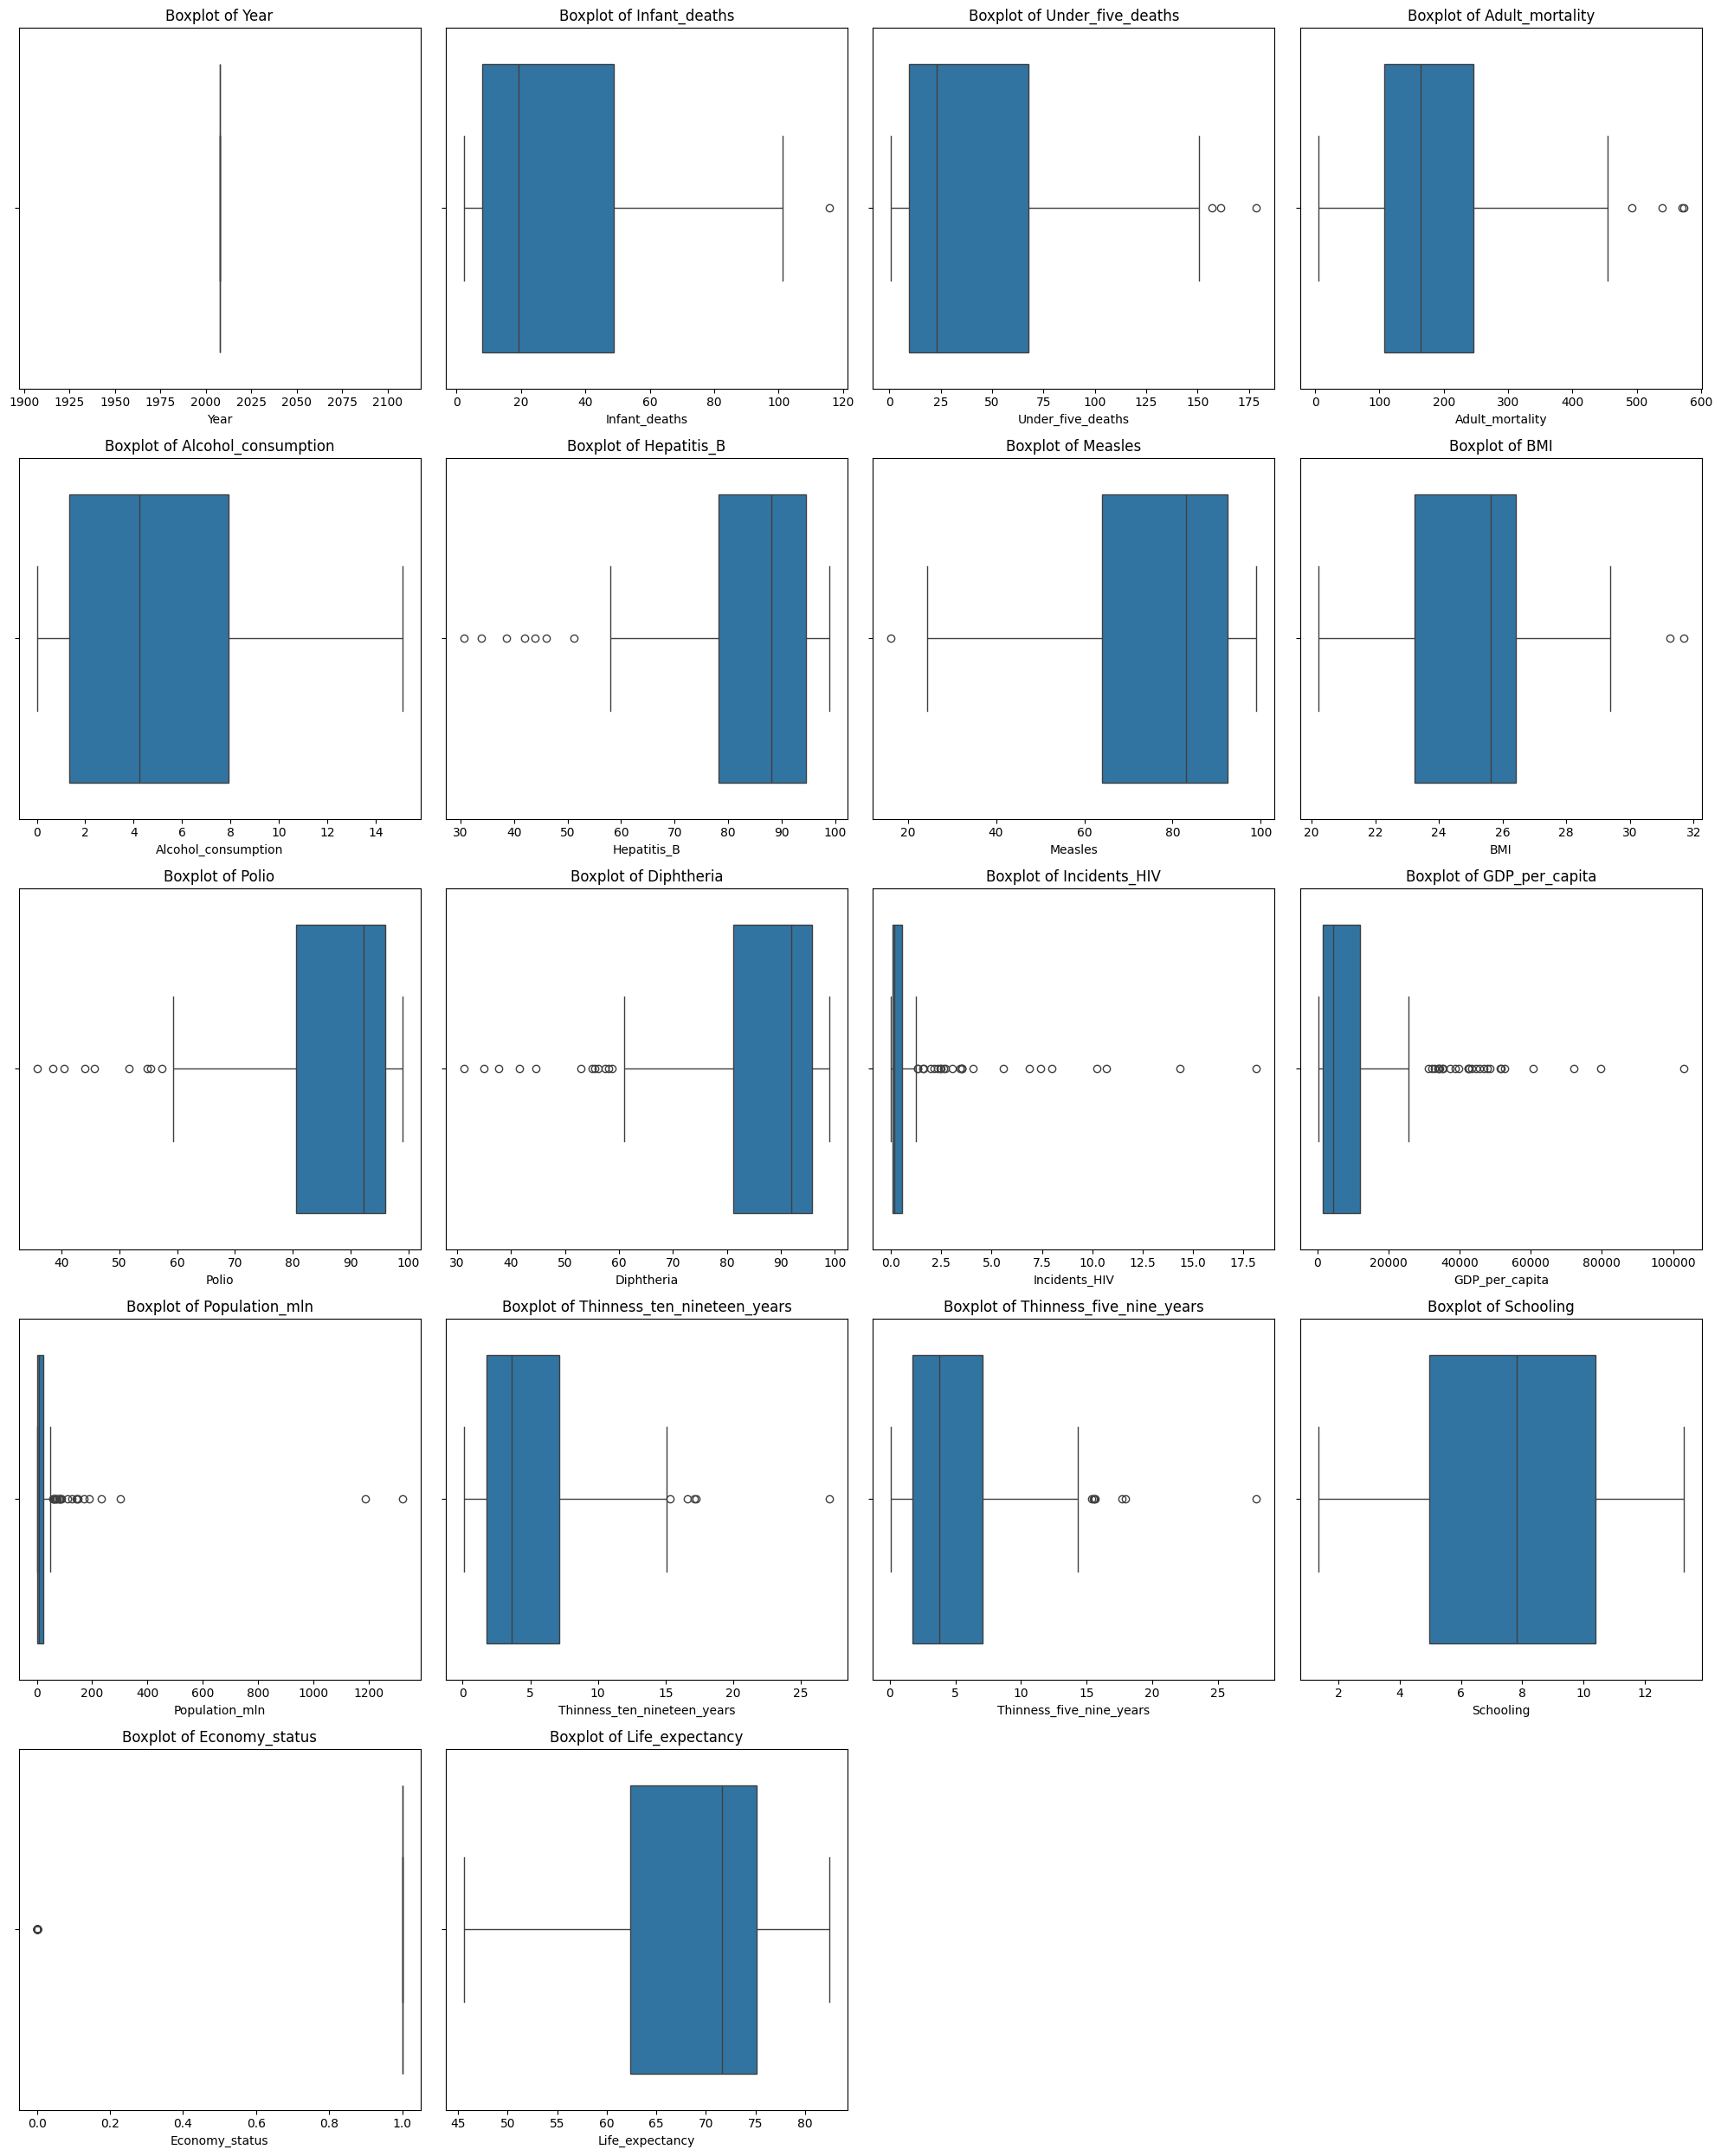

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수들만 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 4x4 서브플롯 생성
num_cols = 4
num_rows = (len(numeric_columns) // num_cols) + (1 if len(numeric_columns) % num_cols != 0 else 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# 각 변수에 대해 상자그림 그리기
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')
    
# 남은 서브플롯이 있을 경우 비우기
for j in range(i + 1, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [248]:
# IQR을 이용한 이상치 탐지
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 구하기
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 각 변수에 대해 이상치 찾기
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(df, column)
    print(f"Number of outliers in {column}: {len(outliers)}")
    
    # 이상치가 포함된 'Country'와 해당 값 출력
    print(outliers[['Country', column]])  # 'Country' 칼럼과 이상치가 있는 칼럼 출력


Number of outliers in Year: 0
Empty DataFrame
Columns: [Country, Year]
Index: []
Number of outliers in Infant_deaths: 1
          Country  Infant_deaths
141  Sierra Leone      115.71875
Number of outliers in Under_five_deaths: 3
          Country  Under_five_deaths
32           Chad          156.94375
141  Sierra Leone          178.72500
146       Somalia          161.26875
Number of outliers in Adult_mortality: 4
                      Country  Adult_mortality
31   Central African Republic       493.015156
54                   Eswatini       539.565812
92                    Lesotho       571.072719
178                  Zimbabwe       572.974312
Number of outliers in Alcohol_consumption: 0
Empty DataFrame
Columns: [Country, Alcohol_consumption]
Index: []
Number of outliers in Hepatitis_B: 7
                      Country  Hepatitis_B
30                     Canada      33.9375
31   Central African Republic      43.9375
32                       Chad      30.6875
51          Equatorial Guin

#### 1-4. Encoding

In [249]:
# 'Region'과 'Country'의 고유 값 개수 확인
unique_regions = df['Region'].nunique()  # 고유 값의 개수
unique_countries = df['Country'].nunique()  # 고유 값의 개수

print(f"Unique regions: {unique_regions}")
print(f"Unique countries: {unique_countries}")

Unique regions: 9
Unique countries: 180


In [250]:
# Region에 대해 원-핫 인코딩 적용
df_region_encoded = pd.get_dummies(df['Region'], prefix='Region')

# 원-핫 인코딩된 DataFrame과 기존 DataFrame을 합침
df = pd.concat([df, df_region_encoded], axis=1)

# 결과 확인
df.head()


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Life_expectancy,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,...,59.65625,False,True,False,False,False,False,False,False,False
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,...,75.95000,False,False,False,False,False,False,False,True,False
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,...,73.78750,True,False,False,False,False,False,False,False,False
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,...,52.82500,True,False,False,False,False,False,False,False,False
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,...,75.35000,False,False,True,False,False,False,False,False,False


In [251]:
from sklearn.preprocessing import LabelEncoder

# 'Country'에 라벨 인코딩 적용
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

# 결과 확인
df[['Country', 'Country_encoded']].head()

# 최종 데이터프레임 확인
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Country_encoded
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,...,False,True,False,False,False,False,False,False,False,0
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,...,False,False,False,False,False,False,False,True,False,1
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,...,True,False,False,False,False,False,False,False,False,2
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,...,True,False,False,False,False,False,False,False,False,3
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,...,False,False,True,False,False,False,False,False,False,4


#### 1-5. 변수 간 상관 관계

Schooling                      0.739842
Polio                          0.679896
Diphtheria                     0.664295
GDP_per_capita                 0.595502
BMI                            0.588617
Measles                        0.532732
Hepatitis_B                    0.454063
Alcohol_consumption            0.420373
Population_mln                 0.024324
Country_encoded                0.013082
Thinness_five_nine_years      -0.490330
Thinness_ten_nineteen_years   -0.502623
Economy_status                -0.531607
Incidents_HIV                 -0.550506
Infant_deaths                 -0.925644
Under_five_deaths             -0.927310
Adult_mortality               -0.947227
Year                                NaN
Name: Life_expectancy, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_21304\1538301643.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=life_expectancy_corr_sorted.index, y=life_expectancy_corr_sorted.values, palette='coolwarm')


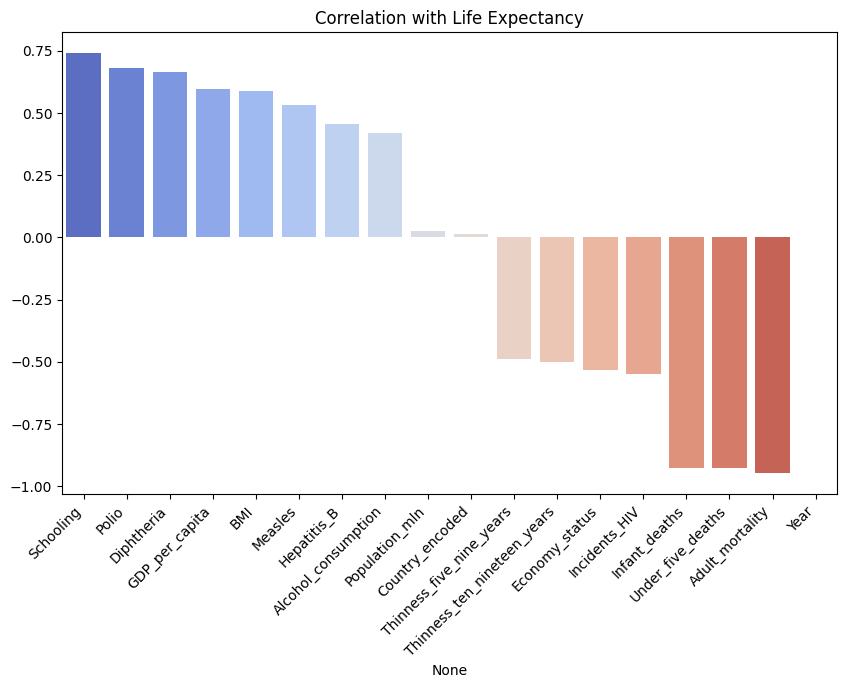

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터만 선택하여 상관계수 계산
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# 기대수명과 다른 변수들 간의 상관계수만 뽑기
life_expectancy_corr = corr_matrix['Life_expectancy'].drop('Life_expectancy')  # 자기 자신과의 관계 제거

# 기대수명과의 상관계수를 내림차순으로 정렬
life_expectancy_corr_sorted = life_expectancy_corr.sort_values(ascending=False)

# 결과 출력
print(life_expectancy_corr_sorted)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=life_expectancy_corr_sorted.index, y=life_expectancy_corr_sorted.values, palette='coolwarm')
plt.title('Correlation with Life Expectancy')
plt.xticks(rotation=45, ha='right')
plt.show()


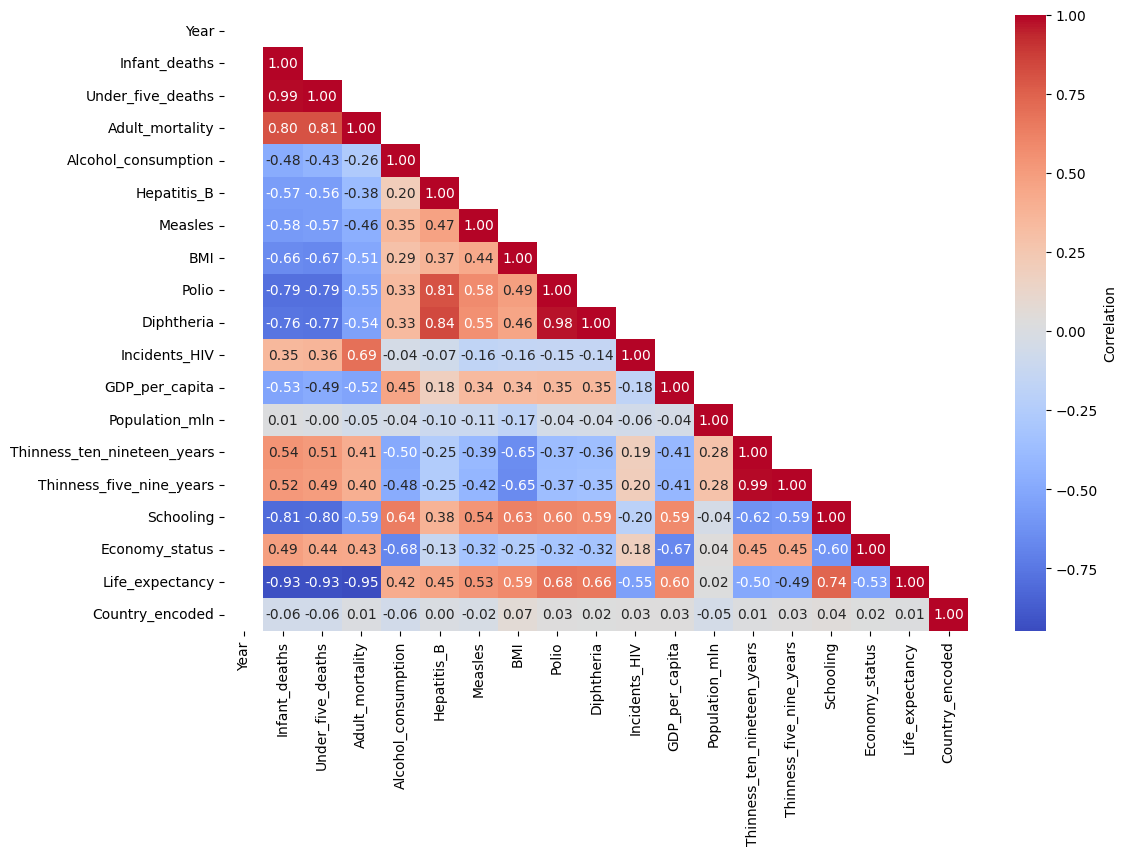

In [253]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터만 선택하여 상관계수 계산
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# 자기 자신과의 관계 제거
corr_matrix = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.show()


In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# 수치형 변수만 선택 (국가 이름과 같은 범주형 변수는 제외)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 상수 항 추가 (모델의 절편을 포함)
df_numeric_const = add_constant(df_numeric)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = df_numeric_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric_const.values, i) for i in range(df_numeric_const.shape[1])]

# VIF 출력
print(vif_data)


                       Variable          VIF
0                          Year  5979.413761
1                 Infant_deaths    51.545600
2             Under_five_deaths    61.300625
3               Adult_mortality    27.191129
4           Alcohol_consumption     2.708740
5                   Hepatitis_B     4.133808
6                       Measles     1.867686
7                           BMI     2.978077
8                         Polio    24.151475
9                    Diphtheria    26.706093
10                Incidents_HIV     2.914893
11               GDP_per_capita     2.571161
12               Population_mln     1.190803
13  Thinness_ten_nineteen_years    40.783668
14     Thinness_five_nine_years    40.943215
15                    Schooling     5.023130
16               Economy_status     3.071527
17              Life_expectancy    59.579734
18              Country_encoded     1.064154


In [255]:
# 제거할 컬럼 리스트
columns_to_drop = ['Year', 'Infant_deaths', 'Thinness_five_nine_years', 'Country_encoded', 'Country', 'Region']

# 데이터프레임에서 컬럼 제거
df.drop(columns=columns_to_drop, inplace=True)

# 결과 확인
print(df.columns)
print(df.head())

Index(['Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Schooling', 'Economy_status', 'Life_expectancy', 'Region_Africa',
       'Region_Asia', 'Region_Central America and Caribbean',
       'Region_European Union', 'Region_Middle East', 'Region_North America',
       'Region_Oceania', 'Region_Rest of Europe', 'Region_South America'],
      dtype='object')
   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0           98.61250       265.804969             0.016125      64.5625   
1           17.14375        83.132969             4.696875      98.0000   
2           31.19375       113.439281             0.400625      88.3125   
3          144.16250       297.844063             4.935625      68.8125   
4           11.51875       142.478813             7.755000      98.2500   

   Measles    

### 2. 데이터 전처리

#### 2-1. 데이터 분할

In [256]:
# 선택된 유의미한 변수들 (음의 상관계수 변수 포함)
selected_features = ['Schooling', 'Polio', 'Diphtheria', 'GDP_per_capita', 
                     'BMI', 'Measles', 'Hepatitis_B', 'Alcohol_consumption', 
                     'Region_European Union', 'Adult_mortality', 'Under_five_deaths', 
                     'Economy_status', 'Incidents_HIV', 'Region_Africa', 'Region_Rest of Europe', 'Thinness_ten_nineteen_years']

# 목표 변수 (타겟 변수)
target = 'Life_expectancy'


In [257]:
from sklearn.model_selection import train_test_split

# 특성과 타겟 변수 설정
X = df[selected_features][:-1]
y = df[target][:-1]

# 마지막 데이터 분리 (korea_data)
korea_data = df.iloc[[-1]]  # 마지막 데이터 행
X_korea = korea_data[selected_features]
y_korea = korea_data[target]

# 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2-2. 스케일링(Scaling)

In [258]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 스케일링 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 스케일링 적용
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에 동일한 스케일링 적용 (훈련 데이터의 통계량 사용)
X_test_scaled = scaler.transform(X_test)
X_korea_scaled = scaler.transform(X_korea)

# 스케일링 전 후 비교 (훈련 데이터)
train_mean = np.mean(X_train_scaled, axis=0)
train_std = np.std(X_train_scaled, axis=0)

# 스케일링 전 후 비교 (테스트 데이터)
test_mean = np.mean(X_test_scaled, axis=0)
test_std = np.std(X_test_scaled, axis=0)

# 스케일링 전후 비교 출력
print("훈련 데이터 평균:", train_mean)
print("훈련 데이터 표준편차:", train_std)

print("\n테스트 데이터 평균:", test_mean)
print("테스트 데이터 표준편차:", test_std)

# 추가적으로, 스케일링 전후 데이터의 상위 5개 샘플 출력
print("\n스케일링 전 훈련 데이터 (상위 5개 샘플):")
print(X_train.head())

print("\n스케일링 후 훈련 데이터 (상위 5개 샘플):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


훈련 데이터 평균: [ 6.08681714e-16  3.10551895e-16  2.60863592e-16 -4.65827843e-17
 -3.85084350e-16  1.49064910e-16  3.54029160e-16 -3.72662274e-17
 -2.48441516e-17 -1.11798682e-16 -7.45324548e-17  1.36642834e-16
  6.21103790e-18  4.96883032e-17  6.21103790e-18  2.42230478e-16]
훈련 데이터 표준편차: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

테스트 데이터 평균: [ 0.01162469 -0.0039695   0.02327235  0.10279393 -0.12714443  0.00981868
 -0.02057498 -0.03174106  0.15737519 -0.03097482  0.05877073 -0.1365758
 -0.04537048 -0.17113728 -0.23596404  0.22075517]
테스트 데이터 표준편차: [1.11174503 0.98768412 0.94032699 0.98938157 0.80131801 0.98188217
 1.14647941 1.07478306 1.14107451 0.97557849 1.09931664 1.09121101
 0.65358219 0.90661587 0.55297906 1.16287551]

스케일링 전 훈련 데이터 (상위 5개 샘플):
     Schooling    Polio  Diphtheria  GDP_per_capita       BMI  Measles  \
158    7.11875  98.3125     98.1875       4739.2500  23.56250  92.6250   
31     3.46250  44.0000     44.6875        466.6875  22.17500  64.0000   
12     4.72500

### 3. 모델 학습 및 평가

In [259]:
from sklearn.metrics import mean_squared_error             # MSE (평균 제곱 오차)
from sklearn.metrics import root_mean_squared_error        # RMSE (제곱 평균 제곱근 오차)
from sklearn.metrics import mean_absolute_error            # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error         # MSLE (평균 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error    # RMSLE (제곱 평균 제곱근 로그 오차)
from sklearn.metrics import r2_score                       # R^2 결정계수
from scipy.stats import norm

def evaluataion(y_true, y_pred):
    print('mse: ',mean_squared_error(y_true, y_pred))
    print('rmse: ',root_mean_squared_error(y_true, y_pred))
    print('mae: ', mean_absolute_error(y_true, y_pred))
    print('msle: ',mean_squared_log_error(y_true, y_pred))
    print('rmsle: ',root_mean_squared_log_error(y_true, y_pred))
    print('r2_score: ',r2_score(y_true, y_pred))
    
    plt.figure(figsize=(10, 5))

    # 산점도 그래프
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue', label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red', label='Perfect Fit')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.legend()

    # 잔차 시각화
    plt.subplot(1, 2, 2)
    residuals = y_true - y_pred
    mean_residuals = np.mean(residuals)
    std_residuals = np.std(residuals)

    # 히스토그램
    sns.histplot(residuals, bins=30, kde=True, color='green', edgecolor='black', alpha=0.7, stat="density", label="Residuals")
    sns.kdeplot(residuals, color='blue', linestyle='--', label='residuals_line')
    
    # 정규분포 곡선
    x_range = np.linspace(min(residuals), max(residuals), 100)
    plt.plot(x_range, norm.pdf(x_range, mean_residuals, std_residuals), color='red', linestyle='--', label="Normal Dist.")

    # plt.axvline(x=0, color='blue', linestyle='--', label="Zero Residual")
    plt.xlabel("Residuals")
    plt.ylabel("Density")
    plt.title("Residual Distribution (with Normal Curve)")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [260]:
# korea_data 스케일링
X_korea_scaled = scaler.transform(X_korea)

def korea_pred(model):
    # 마지막 데이터 예측 (korea_data 사용, 이미 스케일링된 X_korea_scaled 사용)
    y_pred = model.predict(X_korea_scaled)

    # 실제값 (마지막 데이터의 실제 값)
    actual_value = y_korea.iloc[0]

    # 예측값과 실제값 출력
    print(f"예측값: {y_pred[0]}")
    print(f"실제값: {actual_value}")

    # 예측값과 실제값의 차이 확인 (오차)
    error = abs(actual_value - y_pred[0])
    print(f"예측 오차: {error}")



#### 3-1. Linear Regression

Linear Regression MAE: 0.83, MSE: 1.10
mse:  1.101358232840826
rmse:  1.049456160514019
mae:  0.826333845987011
msle:  0.00025358165738405405
rmsle:  0.01592424746680527
r2_score:  0.9877339630657576


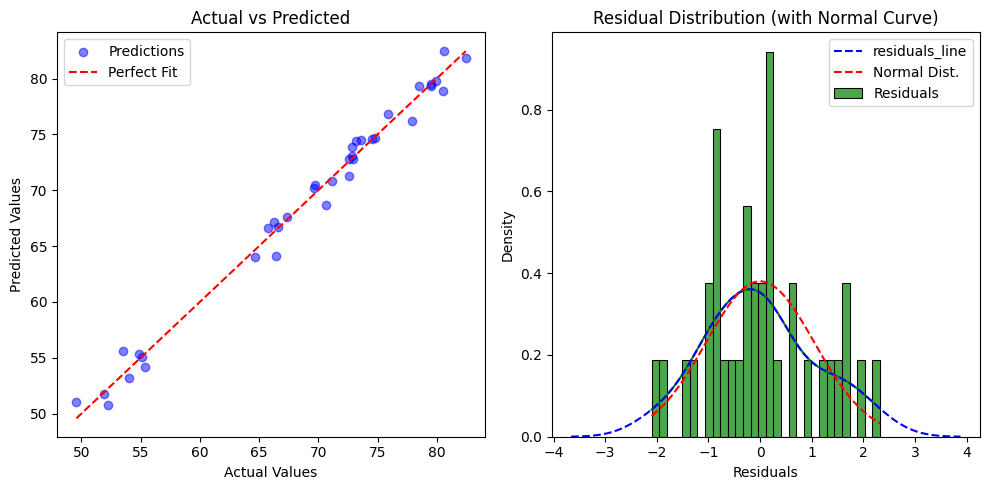

예측값: 82.27684908076387
실제값: 79.16
예측 오차: 3.1168490807638705


In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델 생성 및 학습
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_lr = lr_model.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}")

evaluataion(y_test, y_pred_lr)
korea_pred(lr_model)

#### 3-2. Random Forest Regressor 

Random Forest MAE: 1.18, MSE: 2.17
mse:  2.1693442995877033
rmse:  1.4728694102287898
mae:  1.17790451388891
msle:  0.0005534571608395785
rmsle:  0.023525670252717103
r2_score:  0.9758395983174379


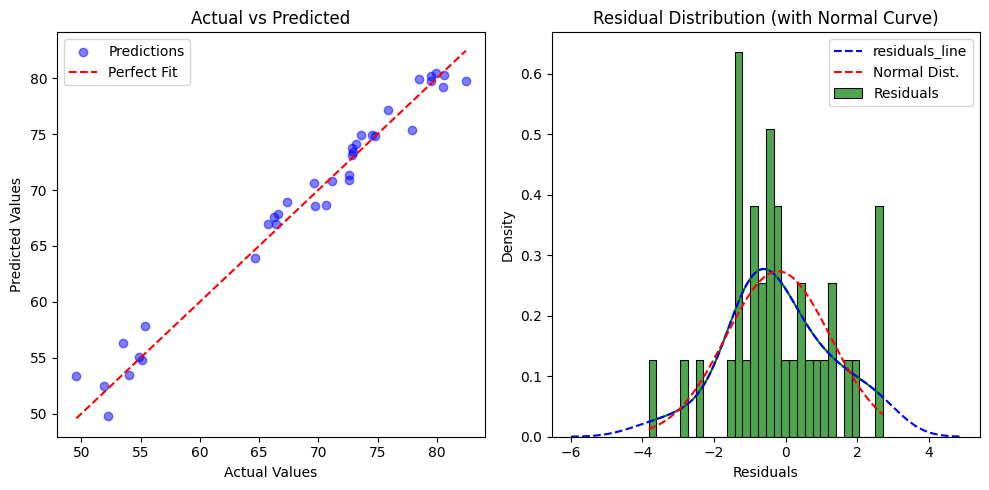

예측값: 78.92350000000003
실제값: 79.16
예측 오차: 0.23649999999996396


In [262]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}")

evaluataion(y_test, y_pred_rf)
korea_pred(rf_model)


#### 3-3. XGBoost Regressor

mse:  3.036648278443481
rmse:  1.7425981402616844
mae:  1.2792737325032553
msle:  0.0008571655937964495
rmsle:  0.02927739048816423
r2_score:  0.9661802683005187


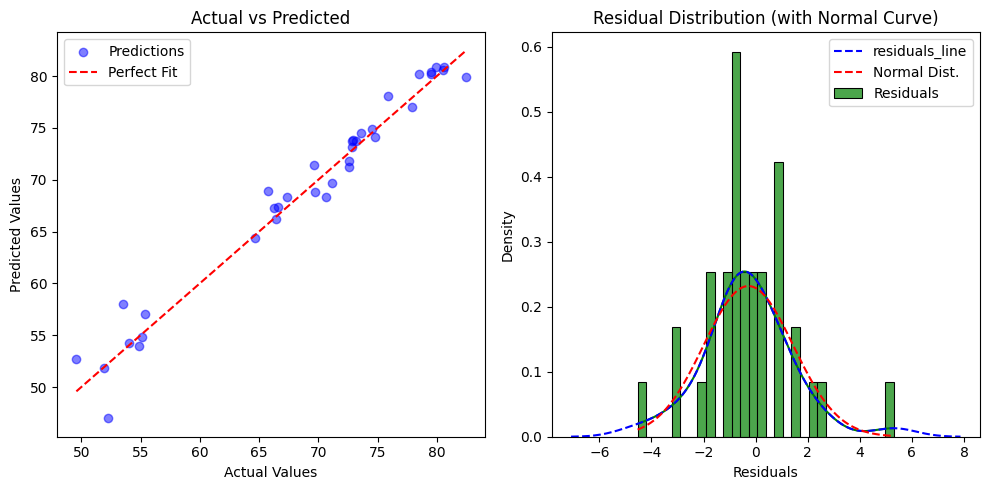

XGBoost MAE: 1.28, MSE: 3.04
예측값: 80.1785888671875
실제값: 79.16
예측 오차: 1.0185888671875034


In [263]:
import xgboost as xgb

# 모델 생성 및 학습
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_xgb = xgb_model.predict(X_test_scaled)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

evaluataion(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}")

korea_pred(xgb_model)


#### 3-4. LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 143, number of used features: 15
[LightGBM] [Info] Start training from score 68.849475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

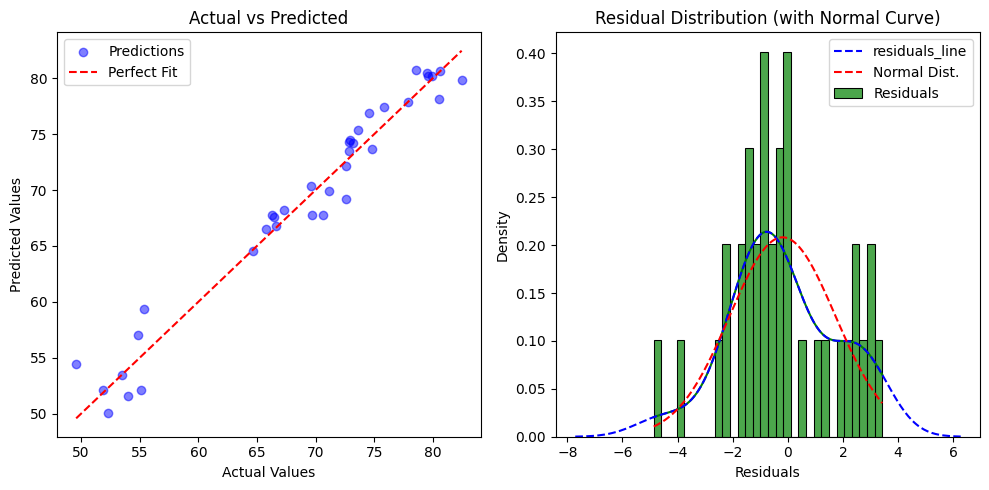

예측값: 78.70631555265331
실제값: 79.16
예측 오차: 0.45368444734668856


In [264]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 생성
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# 모델 학습
lgb_model.fit(X_train_scaled, y_train)

# 예측 (테스트 데이터에 대해 예측)
y_pred_lgb = lgb_model.predict(X_test_scaled)

# 성능 평가
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM MSE: {mse_lgb}")
print(f"LightGBM MAE: {mae_lgb}")
print(f"LightGBM R²: {r2_lgb}")

# 평가 함수 실행
evaluataion(y_test, y_pred_lgb)

# korea_data 예측
korea_pred(lgb_model)


### 4. 모델 성능 향상 시도

#### 4-2-1. 배깅 기법(RandomForest Regressor)

Random Forest 성능 평가:
MAE: 1.1777795138889102
MSE: 2.1692774402127037
R2: 0.9758403429430635
mse:  2.1692774402127037
rmse:  1.4728467130739382
mae:  1.1777795138889102
msle:  0.0005534449679630126
rmsle:  0.0235254111114559
r2_score:  0.9758403429430635


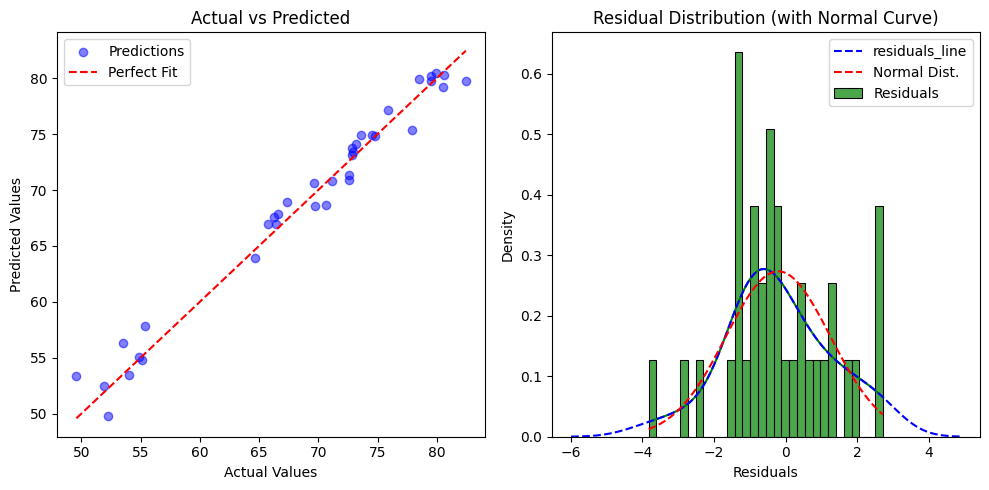

예측값: 79.60268749999999
실제값: 79.16
예측 오차: 0.442687499999991


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [265]:
# 다인
# RandomForest 모델 훈련
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest 성능 평가:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R2: {r2_rf}")

evaluataion(y_test, y_pred_rf)
korea_pred(rf_model) 

#### 4-2-2 GradientBoosting Regressor(부스팅 기법)


Gradient Boosting 성능 평가:
MAE: 1.1252736880033856
MSE: 1.7998594784899704
R2: 0.9799546213200233
mse:  1.7998594784899704
rmse:  1.3415884162029614
mae:  1.1252736880033856
msle:  0.00042012358966292076
rmsle:  0.020496916589158497
r2_score:  0.9799546213200233


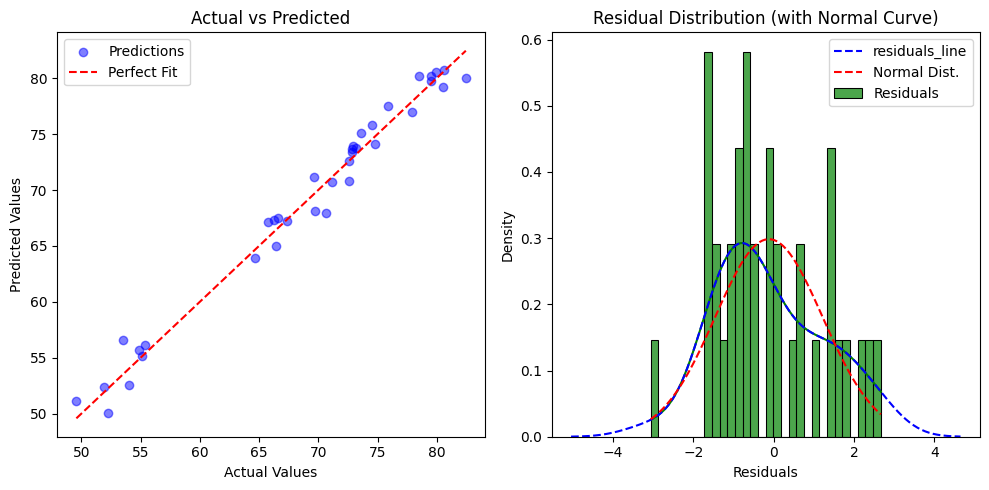

예측값: 77.21559852980567
실제값: 79.16
예측 오차: 1.9444014701943217


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [266]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

# GradientBoosting 모델 훈련
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 성능 평가
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting 성능 평가:")
print(f"MAE: {mae_gb}")
print(f"MSE: {mse_gb}")
print(f"R2: {r2_gb}")

evaluataion(y_test, y_pred_gb)
korea_pred(gb_model) 

#### 4-2-3. 앙상블 결과 결합 - 보팅

Random Forest 성능 평가:
MAE: 1.1778, MSE: 2.1693, R2: 0.9758

Gradient Boosting 성능 평가:
MAE: 1.1253, MSE: 1.7999, R2: 0.9800

mse:  1.8102691853849835
rmse:  1.345462442948514
mae:  1.1281685833887591
msle:  0.0004440300340031681
rmsle:  0.02107202016901009
r2_score:  0.9798386864266875


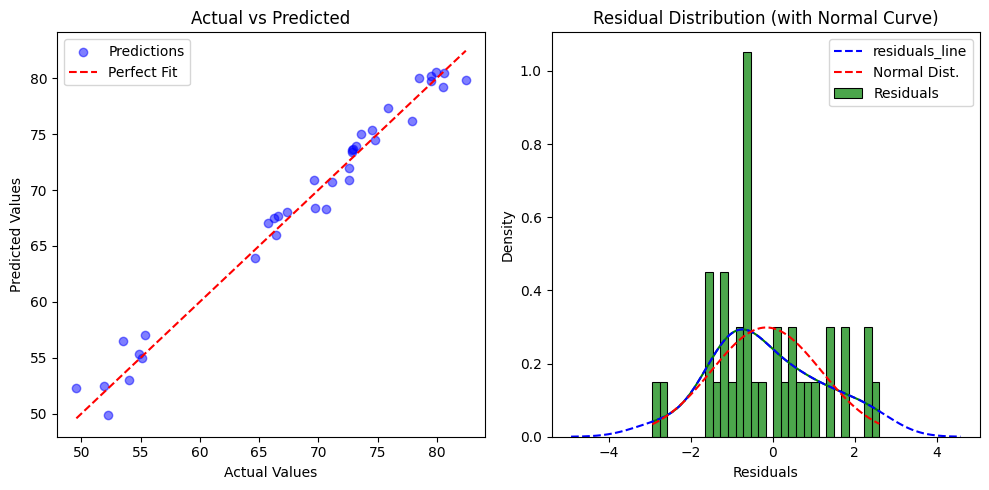

예측값: 78.40914301490284
실제값: 79.16
예측 오차: 0.7508569850971583


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [267]:
# VotingRegressor 생성
voting_model = VotingRegressor([
    ('rf', rf_model), 
    ('gb', gb_model)
])

# 학습
voting_model.fit(X_train, y_train)

# 예측
y_pred_voting = voting_model.predict(X_test)

# 성능 평가 함수
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} 성능 평가:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}\n")

# 개별 모델 평가
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

evaluataion(y_test, y_pred_voting)
korea_pred(voting_model) 

#### 4-3. GrisSesarch

In [268]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
xgb_reg = XGBRegressor()
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5,verbose=1)
grid_search.fit(X_train,y_train)
print("최적의 파라미터:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적의 파라미터: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}



XGBoost 성능 평가:
MAE: 1.192643631829156
MSE: 2.2109802051878247
R2: 0.9753758912867433
mse:  2.2109802051878247
rmse:  1.4869365168654056
mae:  1.192643631829156
msle:  0.0006018966592717637
rmsle:  0.024533582275561874
r2_score:  0.9753758912867433


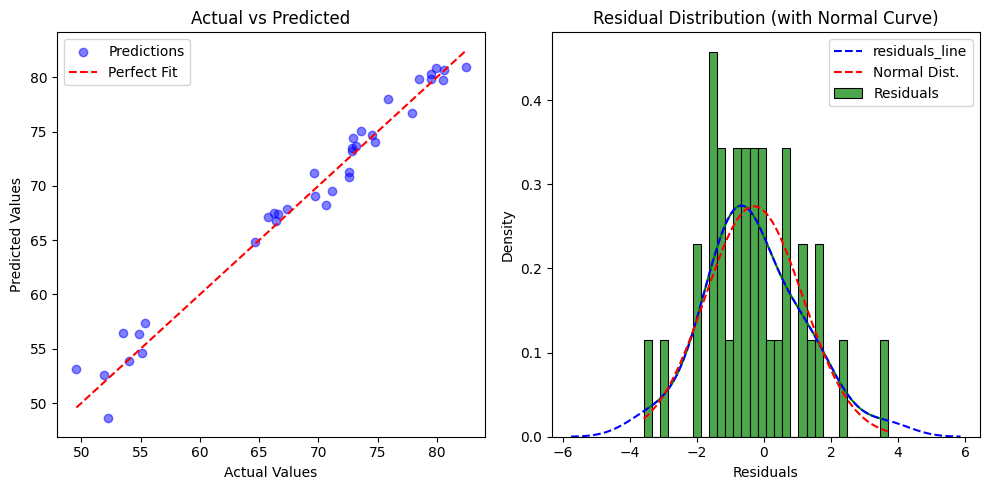

예측값: 76.37752532958984
실제값: 79.16
예측 오차: 2.782474670410153


In [269]:
xgb_reg = XGBRegressor(learning_rate = 0.1, max_depth= 5, n_estimators= 200, subsample= 0.8)

xgb_reg.fit(X_train,y_train)

# 예측
xgb_reg_predict = xgb_reg.predict(X_test)

# 성능 평가
mae_xgb = mean_absolute_error(y_test, xgb_reg_predict)
mse_xgb = mean_squared_error(y_test, xgb_reg_predict)
r2_xgb = r2_score(y_test, xgb_reg_predict)

print("\nXGBoost 성능 평가:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R2: {r2_xgb}")

evaluataion(y_test, xgb_reg_predict)
korea_pred(xgb_reg) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best GB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Random Forest 성능 평가:
MAE: 1.1965, MSE: 2.1943, R2: 0.9756

Gradient Boosting 성능 평가:
MAE: 1.1253, MSE: 1.7999, R2: 0.9800

Voting Ensemble (RF + GB) 성능 평가:
MAE: 1.1327, MSE: 1.8332, R2: 0.9796

mse:  2.194333538302962
rmse:  1.481328301998906
mae:  1.1965381944444513
msle:  0.0005621486868380423
rmsle:  0.023709674962724442
r2_score:  0.975561288394381


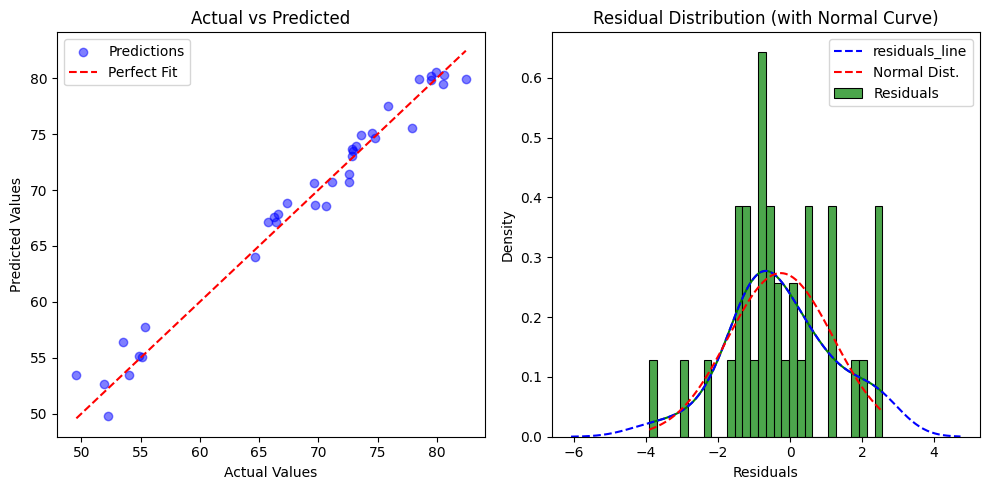

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


예측값: 79.36859375000009
실제값: 79.16
예측 오차: 0.20859375000009095
mse:  1.7998594784899704
rmse:  1.3415884162029614
mae:  1.1252736880033856
msle:  0.00042012358966292076
rmsle:  0.020496916589158497
r2_score:  0.9799546213200233


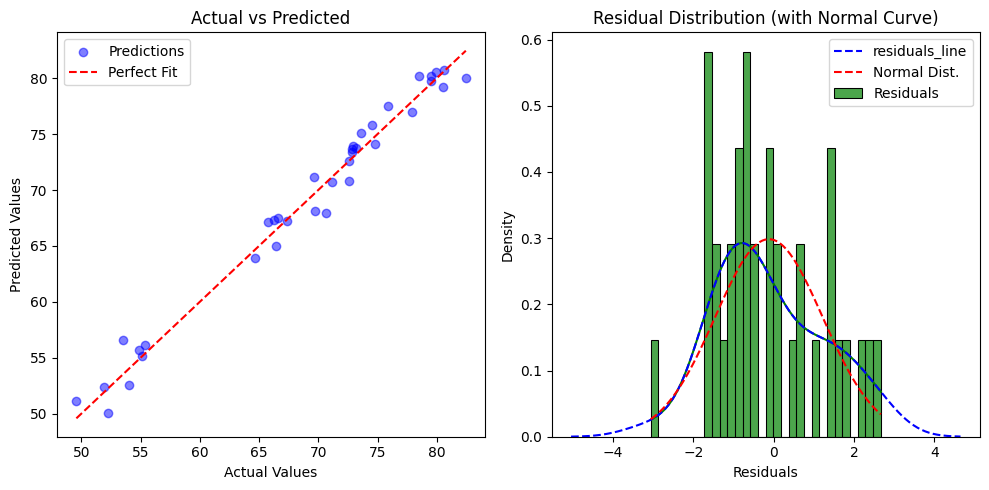

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


예측값: 77.21559852980567
실제값: 79.16
예측 오차: 1.9444014701943217
mse:  1.8332152589246904
rmse:  1.3539627982055824
mae:  1.132669451444312
msle:  0.0004502115988773254
rmsle:  0.021218190282805114
r2_score:  0.979583131624316


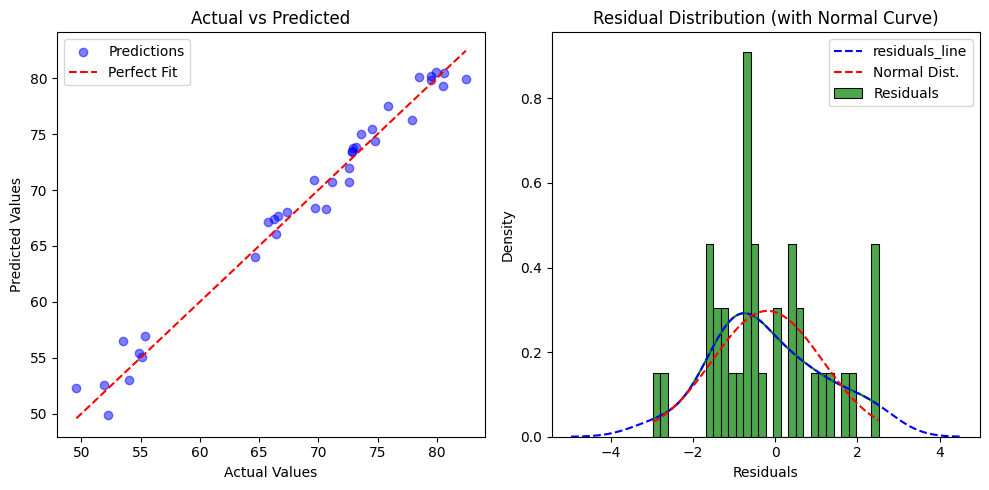

예측값: 78.29209613990288
실제값: 79.16
예측 오차: 0.8679038600971154


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [270]:

# RandomForest 하이퍼파라미터 그리드
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# GradientBoosting 하이퍼파라미터 그리드
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
}

# RandomForest 최적화
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
gs_rf.fit(X_train, y_train)
print("Best RF Params:", gs_rf.best_params_)

# GradientBoosting 최적화
gs_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
gs_gb.fit(X_train, y_train)
print("Best GB Params:", gs_gb.best_params_)

# 최적 모델로 예측
y_pred_rf = gs_rf.best_estimator_.predict(X_test)
y_pred_gb = gs_gb.best_estimator_.predict(X_test)

# VotingRegressor 생성
voting_model = VotingRegressor([
    ('rf', gs_rf.best_estimator_), 
    ('gb', gs_gb.best_estimator_)
])

# 학습
voting_model.fit(X_train, y_train)

# 예측
y_pred_voting = voting_model.predict(X_test)

# 성능 평가 함수
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} 성능 평가:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}\n")

# 개별 모델 평가
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# VotingRegressor 평가
evaluate_model(y_test, y_pred_voting, "Voting Ensemble (RF + GB)")

evaluataion(y_test, y_pred_rf)
korea_pred(gs_rf) 

evaluataion(y_test, y_pred_gb)
korea_pred(gs_gb) 

evaluataion(y_test, y_pred_voting)
korea_pred(voting_model) 
